In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
capital=3473 # capital in $ of your FARM VAULT
farm_apr_daily=0.0113  ## write the number you see in "Farm Daily:" in your FARM VAULT.  The script take care of the %
farm_apr_daily=farm_apr_daily/100
acs_vault_daily=0.101  ## write the number you see in "Farm Daily:" in your ACS VAULT.  The script take care of the %
acs_vault_daily=acs_vault_daily/100 
acs_value=8.6 ## value of a ACS token in $
acs_fee=0.03 #harvesting fee
period=365 ## I consider a period of one year

In [11]:
### first we find after how many days we have a FARM worth to be harvested since there is a 0.03 fee
min_day=1
for days in range(100):
  est_base=  (capital*farm_apr_daily*days)/acs_value
  if(est_base>acs_fee):
    min_day=days
    break

## in res_df we store the results for all the compounding interval we will compute
res_df=pd.DataFrame()
## "comp_intervals" is a list that represent the intervals we want to simulate, in days, between harvesting events
## if we farm every 2 days what wold be the total ACS token in the vault?
## if we farm every 3 days what would be .... 
## if we farm every 4 days...
comp_intervals=range(min_day,period,1)

for days_interval in comp_intervals:
  ## in a "period" there are a certain number of compounding events
  ## imagine we are testing an harvesting event every 30 days, in a year there woud be 12 events
  ## 30, 60, 90.... until 360
  aseq=range(days_interval, period, days_interval)

  ##  the interest give by the FARM vault is "capital*days_in_the_vault*farm_apr_daily"
  ## if we want to find the number of acs tokens we have to divide by acs_value and subtract the harvesting fee
  harvest_val= (capital*days_interval*farm_apr_daily)/acs_value -acs_fee
  
  acs_vault=0

  for i in aseq:
    ## first we compute the interest we obtained in the ACS vault
    for j in range(1,days_interval,1):
      acs_interest=acs_vault*acs_vault_daily
      acs_vault=acs_vault+acs_interest
    
    
    ## then we add the farmed ACS, to the ACS vault
    acs_vault=acs_vault+harvest_val
  
  
  ## there may be additional days before the end of the period
  ## as before, if we have a compounding event every 30 days, and we consider
  ## a period of 365 days, there are 5 days that are not considered. We need to take
  ## them into consideration
  harvest_val=capital*(period-max(aseq))*farm_apr_daily/acs_value
  for j in range(max(aseq),period,1):
    acs_interest=acs_vault*acs_vault_daily
    acs_vault=acs_vault+acs_interest
  
  acs_vault=acs_vault+acs_interest+harvest_val
  
  adf=pd.DataFrame([{"comp_days":days_interval, "farm_acs":acs_vault, "harvest_val":harvest_val}])
    
  res_df=pd.concat([res_df, adf], ignore_index=True)


best_comp_day=res_df.loc[res_df.farm_acs == res_df.farm_acs.max(), 'comp_days']
best_farm_val=res_df.loc[res_df.farm_acs == res_df.farm_acs.max(), 'harvest_val']
best_vault_val=res_df.loc[res_df.farm_acs == res_df.farm_acs.max(), 'farm_acs']
a_text="Harvest at:"+str(best_comp_day.item())+ " every "+  str(round(best_farm_val.item(),2)) +" ACS"

Text(0.5, 1.0, 'Harvest at:41 every 1.69 ACS')

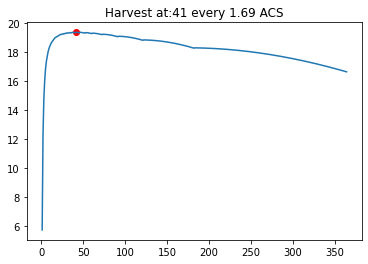

In [12]:

plt.plot(res_df["comp_days"], res_df["farm_acs"])
plt.scatter(best_comp_day, best_vault_val, color="red" )
plt.title(a_text)